In [2]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../..')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [41]:
df = pd.read_csv('tas.csv',sep='\t')

In [42]:
df

,Question,Clear marks,Obtain marks,Time,Test_result
0,10,7,10,10,0
1,10,7,10,9,0
2,10,7,10,8,0
3,10,7,10,7,0
4,10,7,10,6,1
...,...,...,...,...,...
75,10,7,1,7,0
76,10,7,1,6,0
77,10,7,1,5,0
78,10,7,1,4,0


In [6]:
train_data = df.sample(frac=0.8)
train_data

,Question,Clear marks,Obtain marks,Time,Test_result
45,10,7,5,5,0
35,10,7,6,7,0
50,10,7,4,8,0
57,10,7,3,9,0
76,10,7,1,6,0
...,...,...,...,...,...
1,10,7,10,9,0
43,10,7,5,7,0
51,10,7,4,7,0
26,10,7,7,8,0


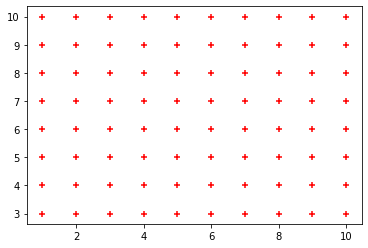

In [7]:
from homemade.logistic_regression import LogisticRegression
plt.scatter(df['Obtain marks'],df.Time,marker='+',color='red')

In [8]:
test_data = df.drop(train_data.index)
test_data

,Question,Clear marks,Obtain marks,Time,Test_result
0,10,7,10,10,0
2,10,7,10,8,0
3,10,7,10,7,0
8,10,7,9,10,0
10,10,7,9,8,0
20,10,7,8,6,1
25,10,7,7,9,0
37,10,7,6,5,0
47,10,7,5,3,0
53,10,7,4,5,0


In [9]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df[['Obtain marks']],df['Time'],train_size=0.9)

In [12]:
X_test

,Obtain marks
12,9
78,1
30,7
7,10
49,4
71,2
72,1
25,7


In [14]:
model.fit(X_train, y_train)

C:\Users\PC\Anaconda3\ana\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PC\Anaconda3\ana\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
X_test

,Obtain marks
12,9
78,1
30,7
7,10
49,4
71,2
72,1
25,7


In [16]:
y_predicted = model.predict(X_test)

In [17]:
model.predict_proba(X_test)

array([[0.09999964, 0.12222051, 0.14008978, 0.1033799 , 0.14008978,
        0.14008978, 0.10544815, 0.14868246],
       [0.12394644, 0.10870733, 0.13248763, 0.14028511, 0.13248763,
        0.13248763, 0.11999669, 0.10960153],
       [0.10620657, 0.11871195, 0.13848576, 0.11271995, 0.13848576,
        0.13848576, 0.10942184, 0.13748241],
       [0.09689105, 0.12396155, 0.14077706, 0.09880161, 0.14077706,
        0.14077706, 0.10339316, 0.15462146],
       [0.11533109, 0.11352996, 0.13562954, 0.12682531, 0.13562954,
        0.13562954, 0.11498242, 0.12244261],
       [0.12115218, 0.11025571, 0.13354633, 0.13593149, 0.13354633,
        0.13354633, 0.11838875, 0.11363288],
       [0.12394644, 0.10870733, 0.13248763, 0.14028511, 0.13248763,
        0.13248763, 0.11999669, 0.10960153],
       [0.10620657, 0.11871195, 0.13848576, 0.11271995, 0.13848576,
        0.13848576, 0.10942184, 0.13748241]])

In [18]:
model.score(X_test,y_test)

0.0

In [33]:
model.predict(X_train)

array([ 7,  7,  7, 10,  6, 10,  7,  5, 10,  5,  5,  7,  5,  6,  5,  7,  6,
        6,  5, 10,  5,  5,  7, 10,  7, 10,  7,  7, 10,  7,  7,  5,  6,  6,
       10,  5, 10,  5, 10, 10, 10,  5,  7,  5,  6, 10,  5,  6,  5, 10,  5,
        5, 10,  6,  6, 10,  6,  5, 10,  7,  6,  5, 10, 10,  7,  5,  5, 10,
        5, 10, 10,  6], dtype=int64)

In [34]:
model.predict(X_test)

array([10,  6,  5, 10,  7,  6,  6,  5], dtype=int64)

In [35]:
model.score(X_train,y_train)

0.1388888888888889

In [40]:
model.predict(X_test)

array([10,  6,  5, 10,  7,  6,  6,  5], dtype=int64)

In [45]:
input_param_name = 'Obtain marks'
input_param_name
output_param_name = 'Time'
output_param_name

'Time'

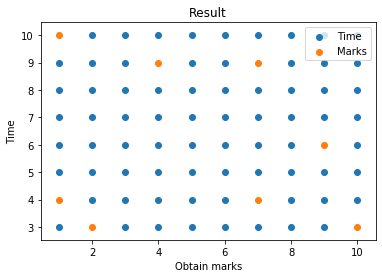

In [47]:
plt.scatter(X_train, y_train, label='Time')
plt.scatter(X_test, y_test, label='Marks')
plt.xlabel(input_param_name)
plt.ylabel(output_param_name)
plt.title('Result')
plt.legend()
plt.show()